Посилання на завдання

https://cms.ucu.edu.ua/mod/vpl/view.php?id=306600&userid=9954 

У модулі expression_calculator.py напишіть функцію calculate_expression, яка буде приймати єдиний аргумент - стрічку з простим формулюванням математичного виразу та повертати ціле число - результат цього виразу. 

Наприклад: параметр функції – «Скільки буде 5 додати 5?», результат функції – 10; або «Скільки буде 2 помножити на 10 додати 7?», результат функції – 27. Для простоти функція не має враховувати пріоритетність операцій, тобто результатом виразу «Скільки буде 2 додати 10 помножити на 7?» буде 84, а не 72. 

Операції, які підтримує функція – "додати"/"плюс", "відняти"/"мінус", "помножити на", "поділити на".  Функція також має вертати стрічку «Неправильний вираз!», якщо вираз не правильний, а саме:

Операції які не підтримуються («Скільки буде 3 в квадраті?»)
Не математичні вирази («Скільки сезонів в році?»)
Математичні операції з неправильним синтаксисом («Скільки буде 2 2 додати?»)

Приклад

calculate_expression("Скільки буде 8 відняти 3?")

5

calculate_expression("Скільки буде 7 додати 3 помножити на 5?")

50

calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")

9

calculate_expression("Скільки буде 3 в кубі?")

'Неправильний вираз!'


Наш неоптимізований, але робочий код

In [12]:
"""Program that calculates basic mathematical operations"""
def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Program that calculates basic mathematical operations 
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    if isinstance(expression, str):
        if 'Скільки буде' in expression and '?' in expression:
            pass
        else:
            return 'Неправильний вираз!'
        symbols = "!?.,"
        for char in expression:
            if char in symbols:
                expression = expression.replace(char, " ")
        expression = expression.split(" ")
        operations = ["додати", "плюс", "відняти", "мінус", "помножити", "поділити"]
        expression1 = []
        for i in expression:
            if i.isnumeric() or "-" in i:
                expression1.append(int(i))
            elif i in operations:
                expression1.append(i)
            elif i not in ['на', 'Скільки', 'буде', '']:
                return 'Неправильний вираз!'
        result = expression1[0]
        for index, element in enumerate(expression1[1:]):
            if isinstance(expression1[index], type(expression1[index + 1])):
                return 'Неправильний вираз!'
            if element in operations:
                cur_operation = element
            elif isinstance(element, int):
                match cur_operation:
                    case "додати" | "плюс":
                        result += element
                    case "відняти" | "мінус":
                        result -= element
                    case "помножити":
                        result *= element
                    case "поділити":
                        if element != 0:
                            result /= element
                        else:
                            return 'Неправильний вираз!'
        return int(result)

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())

TestResults(failed=0, attempted=7)


Перша спроба оптимізувати код

Промпт: Please, optimize this code 
**Implemented function**

In [13]:
import re

def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Program that calculates basic mathematical operations 
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    try:
        match = re.match(r'.*?(\d+)(?:.*?)(\S+)(?:.*?)(\d+)(?:.*?)\?', expression)
        if not match:
            return 'Неправильний вираз!'
        
        num1, operation, num2 = match.groups()
        num1, num2 = int(num1), int(num2)
        
        operations = {
            'додати': lambda x, y: x + y,
            'плюс': lambda x, y: x + y,
            'відняти': lambda x, y: x - y,
            'мінус': lambda x, y: x - y,
            'помножити': lambda x, y: x * y,
            'поділити': lambda x, y: x / y if y != 0 else 'Неправильний вираз!'
        }
        
        result = operations[operation](num1, num2)
        return int(result) if isinstance(result, float) else result
    
    except Exception as e:
        return 'Неправильний вираз!'

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())

**********************************************************************
File "__main__", line 9, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    10
**********************************************************************
File "__main__", line 11, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    5
**********************************************************************
1 items had failures:
   2 of   7 in __main__.calculate_expression
***Test Failed*** 2 failures.
TestResults(failed=2, attempted=7)


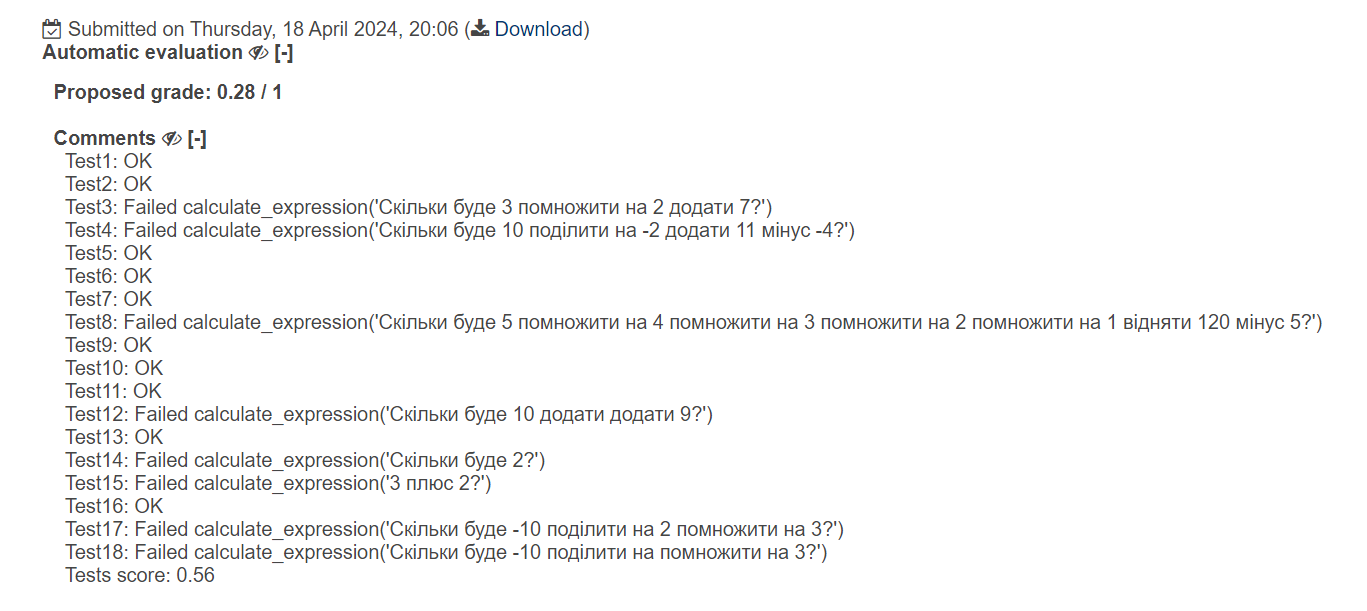

Отже, чат GPT запропонував дуже лаконічний зрозумілий код, але він не працює ідеально.

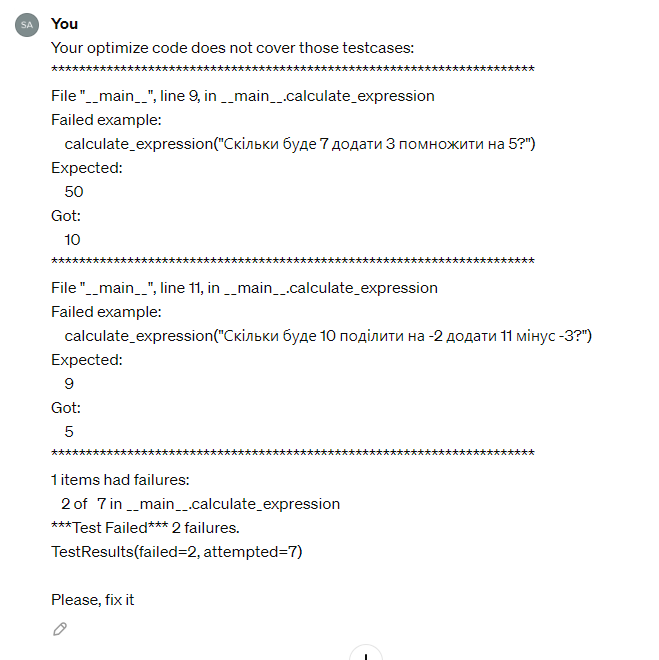
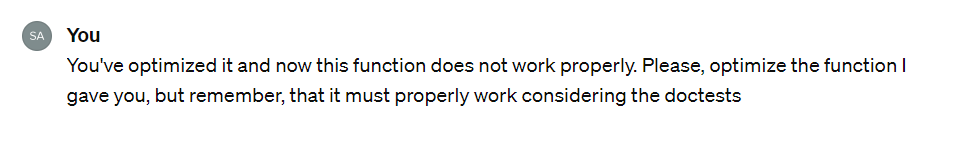

In [14]:
import re

def calculate_expression(expression: str) -> int:
    """
    (str) -> int
    Program that calculates basic mathematical operations 
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    try:
        matches = re.findall(r'(\d+)\s*(\S+)\s*', expression)
        if len(matches) < 2:
            return 'Неправильний вираз!'
        
        result = int(matches[0][0])
        for num, operation in matches[1:]:
            num = int(num)
            if operation == 'поділити' and num == 0:
                return 'Неправильний вираз!'
            result = apply_operation(result, operation, num)
        
        return result
    
    except Exception as e:
        return 'Неправильний вираз!'

def apply_operation(num1, operation, num2):
    if operation == 'додати' or operation == 'плюс':
        return num1 + num2
    elif operation == 'відняти' or operation == 'мінус':
        return num1 - num2
    elif operation == 'помножити':
        return num1 * num2
    elif operation == 'поділити':
        return num1 / num2

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())

**********************************************************************
File "__main__", line 7, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got nothing
**********************************************************************
File "__main__", line 9, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got nothing
**********************************************************************
File "__main__", line 11, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got nothing
**********************************************************************
File "__main__", line 15, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 0?')
Expected:
    'Неправильний вираз!'
Got nothing
*************************

Після цієї поправки стало ще гірше.

Я почала новий чат, щоб не плутати його своїми поправками. На цей раз я пояснила, що він має зробити трохи детельніше.

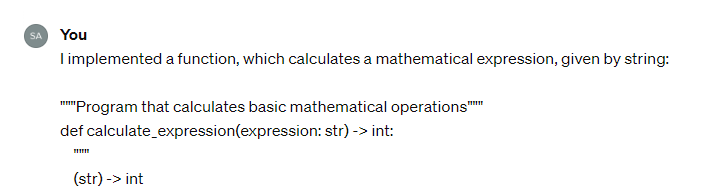

Implementation

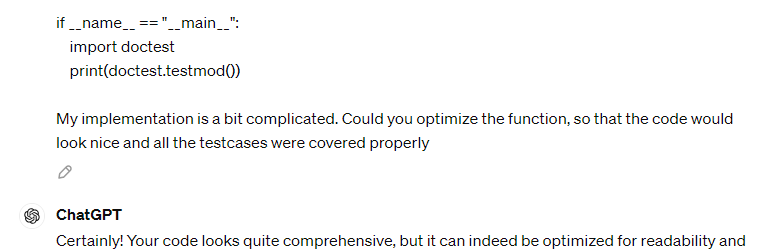

In [15]:
def calculate_expression(expression: str) -> int:
    """
    (str) -> int or str
    Calculates basic mathematical operations given in a string expression.
    
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    operations = {"додати": "+", "плюс": "+", "відняти": "-", "мінус": "-", "помножити": "*", "поділити": "/"}
    tokens = expression.strip("!?.,").split()
    
    if len(tokens) < 5 or tokens[-1] != "?" or tokens[0] != "Скільки" or tokens[1] != "буде":
        return 'Неправильний вираз!'
    
    try:
        result = int(tokens[2])
        for i in range(3, len(tokens), 2):
            op = operations.get(tokens[i])
            if op is None:
                return 'Неправильний вираз!'
            num = int(tokens[i+1])
            if op == "/" and num == 0:
                return 'Неправильний вираз!'
            result = eval(f"{result} {op} {num}")
        return result
    except (ValueError, IndexError):
        return 'Неправильний вираз!'

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 6, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 8, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 10, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 18, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    5


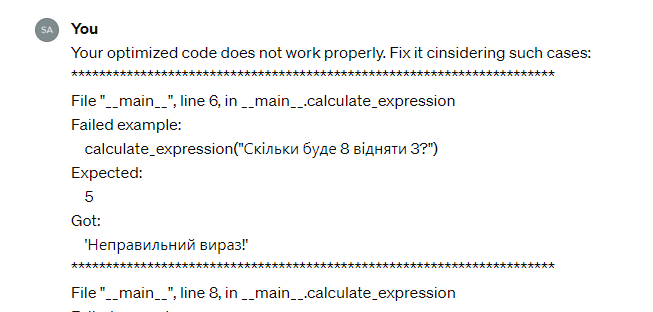

In [16]:
def calculate_expression(expression: str) -> int or str:
    """
    (str) -> int or str
    Calculates basic mathematical operations given in a string expression.
    
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    operations = {"додати": "+", "плюс": "+", "відняти": "-", "мінус": "-", "помножити": "*", "поділити": "/"}
    tokens = expression.strip("!?.,").split()
    
    if len(tokens) < 5 or tokens[-1] != "?" or tokens[0] != "Скільки" or tokens[2] not in operations:
        return 'Неправильний вираз!'
    
    try:
        result = int(tokens[1])
        for i in range(2, len(tokens), 3):
            op = operations.get(tokens[i])
            if op is None:
                return 'Неправильний вираз!'
            num = int(tokens[i+1])
            if op == "/" and num == 0:
                return 'Неправильний вираз!'
            result = eval(f"{result} {op} {num}")
        return result
    except (ValueError, IndexError):
        return 'Неправильний вираз!'

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 6, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 8, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 10, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 18, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    5


Попросила допрацювати його код

In [3]:
def calculate_expression(expression: str) -> int:
    """
    (str) -> int or str
    Calculates basic mathematical operations given in a string expression.
    
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    operations = {
        "додати": "+", "плюс": "+",
        "відняти": "-", "мінус": "-",
        "помножити": "*", "поділити": "/"
    }
    
    # Remove punctuation marks from the expression, keeping spaces
    expression = expression.strip("!?.,")
    
    # Split the expression into words
    tokens = expression.split()
    
    # Check for valid structure of the expression
    if len(tokens) < 5 or tokens[-1] != "?" or tokens[0] != "Скільки" or tokens[1] != "буде":
        return 'Неправильний вираз!'
    
    # Initialize the result with the first number in the expression
    try:
        result = int(tokens[2])
        
        # Process the rest of the expression
        i = 3
        while i < len(tokens):
            op = operations.get(tokens[i])
            if op is None:
                return 'Неправильний вираз!'
            
            i += 1
            
            # Check if there is another operand after the operator
            if i >= len(tokens):
                return 'Неправильний вираз!'
            
            # Convert the next token to an integer
            try:
                num = int(tokens[i])
            except ValueError:
                return 'Неправильний вираз!'
            
            # Perform the operation and update the result
            try:
                if op == "/" and num == 0:
                    return 'Неправильний вираз!'
                result = eval(f"{result} {op} {num}")
            except ZeroDivisionError:
                return 'Неправильний вираз!'
            
            i += 1
        
        return result
    
    except (ValueError, IndexError):
        # Catch and handle exceptions related to invalid expressions
        return 'Неправильний вираз!'

# If you would like, I can execute the doctests and check the output.
if __name__ == "__main__":
    import doctest
    print(doctest.testmod())

**********************************************************************
File "__main__", line 6, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 8, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 10, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 18, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    5


Такі промти не працюють. Чат неправильно їх оптимізує. Тому я спробувала іншу техніку: Дати умову завдання разом з нашою імплементацією. Оскільки сама умова була українською, то я вирішила писати сам промпт українською.

In [18]:
def calculate_expression(expression: str) -> int or str:
    """
    (str) -> int or str
    Calculates basic mathematical operations given in a string expression.
    
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    if not isinstance(expression, str) or 'Скільки буде' not in expression or '?' not in expression:
        return 'Неправильний вираз!'
    
    operations = {"додати": "+", "плюс": "+", "відняти": "-", "мінус": "-", "помножити": "*", "поділити": "/"}
    
    expression = expression.replace("Скільки буде", "").replace("?", "").strip()
    elements = expression.split()
    elements = [e for e in elements if e not in ['на', '']]
    
    if any(e.isdigit() or e.lstrip("-").isdigit() for e in elements):
        expression = "".join([operations.get(e, e) for e in elements])
        try:
            result = eval(expression)
            if isinstance(result, int):
                return result
            else:
                return 'Неправильний вираз!'
        except ZeroDivisionError:
            return 'Неправильний вираз!'
    else:
        return 'Неправильний вираз!'

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 8, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    22
**********************************************************************
File "__main__", line 10, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 12, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 3 в кубі?")
Exception raised:
    Traceback (most recent call last):
      File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\doctest.py", line 1351, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__.calculate_expression[3]>", line 1, in <mo

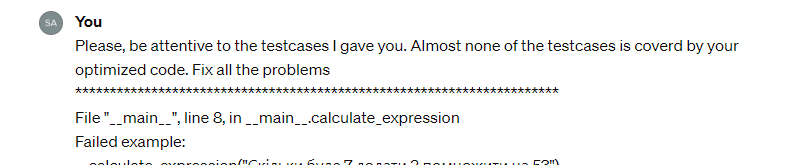

In [19]:
def calculate_expression(expression: str) -> int or str:
    """
    (str) -> int or str
    Calculates basic mathematical operations given in a string expression.
    
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    if not isinstance(expression, str) or 'Скільки буде' not in expression or '?' not in expression:
        return 'Неправильний вираз!'
    
    operations = {"додати": "+", "плюс": "+", "відняти": "-", "мінус": "-", "помножити": "*", "поділити": "/"}
    
    expression = expression.replace("Скільки буде", "").replace("?", "").strip()
    elements = expression.split()
    elements = [e for e in elements if e not in ['на', '']]
    
    # Check if any element is a number or a supported operation
    if any(e.isdigit() or e.lstrip("-").isdigit() or e in operations for e in elements):
        # Replace operation keywords with actual operators
        expression = " ".join([operations.get(e, e) for e in elements])
        try:
            # Evaluate the expression
            result = eval(expression)
            if isinstance(result, int):
                return result
            else:
                return 'Неправильний вираз!'
        except ZeroDivisionError:
            return 'Неправильний вираз!'
    else:
        return 'Неправильний вираз!'

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 8, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    22
**********************************************************************
File "__main__", line 10, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 12, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 3 в кубі?")
Exception raised:
    Traceback (most recent call last):
      File "c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\doctest.py", line 1351, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__.calculate_expression[3]>", line 1, in <mo

Ця стратегія не допомогла, тому спробувала написати промпт англійською, зберігаючи всі стрічки, які є аргументами функції українською. Цього разу чат GPT зазначив, що змінив код за правилами PEP8.

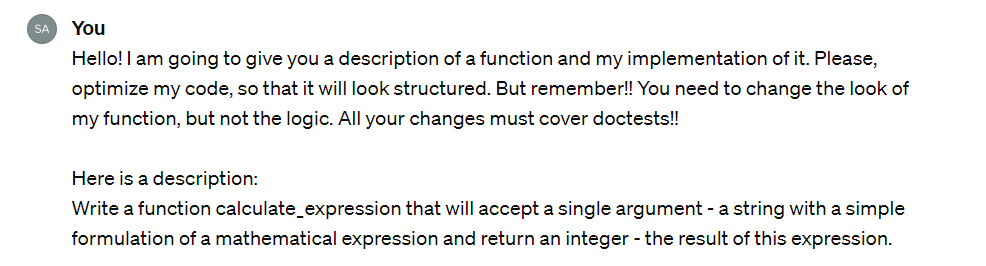

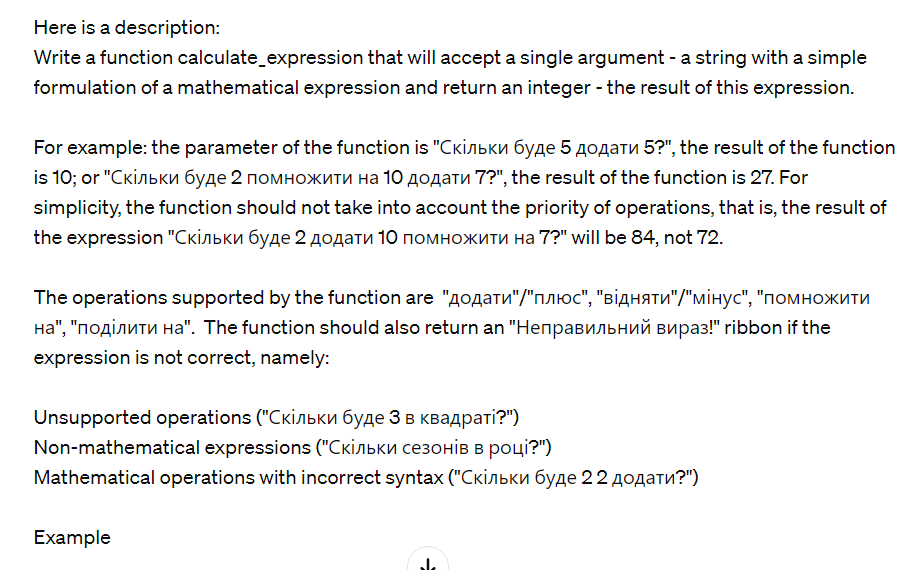

In [1]:
def calculate_expression(expression: str) -> int:
    """
    Calculate a simple mathematical expression given as a string.

    Args:
    expression (str): A string representing a mathematical expression.

    Returns:
    int: The result of the mathematical expression.

    Examples:
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    # Check if the input is a string
    if not isinstance(expression, str):
        return 'Неправильний вираз!'

    # Check if the expression is valid
    if 'Скільки буде' not in expression or '?' not in expression:
        return 'Неправильний вираз!'

    # Remove unnecessary characters and split the expression
    expression = expression.replace("?", "").replace(",", "").split()

    # Define supported operations
    operations = {"додати": "+", "плюс": "+", "відняти": "-", "мінус": "-", "помножити": "*", "поділити": "/"}

    # Initialize variables
    result = None
    operation = None

    # Iterate over expression elements
    for element in expression:
        if element.isdigit() or (element.startswith('-') and element[1:].isdigit()):  # Check if the element is a number
            if result is None:
                result = int(element)
            else:
                return 'Неправильний вираз!'
        elif element in operations:
            if operation is None:
                operation = operations[element]
            else:
                return 'Неправильний вираз!'
        else:
            return 'Неправильний вираз!'

    # Check if all necessary parts are present
    if result is None or operation is None:
        return 'Неправильний вираз!'

    # Evaluate the expression
    try:
        result = eval(str(result) + operation + expression[-1])
        return int(result)
    except ZeroDivisionError:
        return 'Неправильний вираз!'

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())



**********************************************************************
File "__main__", line 12, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 14, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 16, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 24, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    

Я вказала йому на помилку, що зовсім не змінило ситуацію.

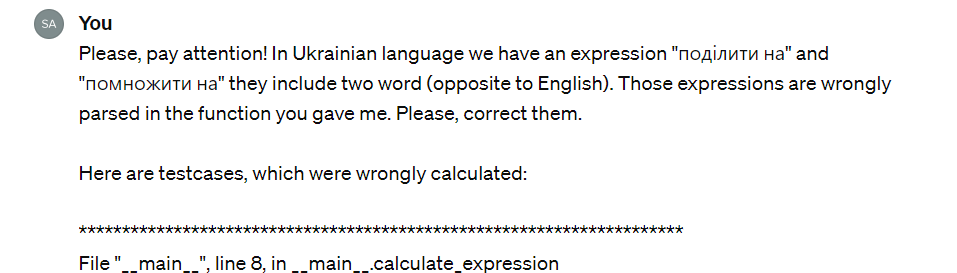

In [2]:
def calculate_expression(expression: str) -> int:
    """
    Calculate a simple mathematical expression given as a string.

    Args:
    expression (str): A string representing a mathematical expression.

    Returns:
    int: The result of the mathematical expression.

    Examples:
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    # Check if the input is a string
    if not isinstance(expression, str):
        return 'Неправильний вираз!'

    # Check if the expression is valid
    if 'Скільки буде' not in expression or '?' not in expression:
        return 'Неправильний вираз!'

    # Remove unnecessary characters and split the expression
    expression = expression.replace("?", "").replace(",", "").split()

    # Define supported operations
    operations = {"додати": "+", "плюс": "+", "відняти": "-", "мінус": "-", "помножити на": "*", "поділити на": "/"}

    # Initialize variables
    result = None
    operation = None

    # Iterate over expression elements
    for element in expression:
        if element.isdigit() or (element.startswith('-') and element[1:].isdigit()):  # Check if the element is a number
            if result is None:
                result = int(element)
            else:
                return 'Неправильний вираз!'
        elif element in operations:
            if operation is None:
                operation = operations[element]
            else:
                return 'Неправильний вираз!'
        else:
            return 'Неправильний вираз!'

    # Check if all necessary parts are present
    if result is None or operation is None:
        return 'Неправильний вираз!'

    # Evaluate the expression
    try:
        result = eval(str(result) + operation + expression[-1])
        return int(result)
    except ZeroDivisionError:
        return 'Неправильний вираз!'

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())



**********************************************************************
File "__main__", line 12, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 14, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 16, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 24, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    

In [1]:
def calculate_expression(expression: str) -> int:
    """
    Calculate a simple mathematical expression given as a string.

    Args:
    expression (str): A string representing a mathematical expression.

    Returns:
    int: The result of the mathematical expression or a string indicating an incorrect expression.

    Examples:
    >>> calculate_expression("Скільки буде 8 відняти 3?")
    5
    >>> calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
    50
    >>> calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
    9
    >>> calculate_expression("Скільки буде 3 в кубі?")
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 0?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 9 додати?')
    'Неправильний вираз!'
    >>> calculate_expression('Скільки буде 10 поділити на 2?')
    5
    """
    # Define supported operations
    operations = {
        "додати": "+",
        "плюс": "+",
        "відняти": "-",
        "мінус": "-",
        "помножити на": "*",
        "поділити на": "/"
    }

    # Remove punctuation and split the expression
    cleaned_expression = expression.replace("?", "").replace(",", "").split()

    # Validate the initial part of the expression
    if cleaned_expression[:3] != ['Скільки', 'буде'] or cleaned_expression[-1] != '':  # Check if the beginning and end are correct
        return 'Неправильний вираз!'

    # Remove the initial and final part of the expression
    cleaned_expression = cleaned_expression[2:-1]

    # Process the expression
    result = None
    operation = None
    index = 0

    while index < len(cleaned_expression):
        # Combine the multi-word operations
        if index + 1 < len(cleaned_expression) and f"{cleaned_expression[index]} {cleaned_expression[index + 1]}" in operations:
            operation = operations[f"{cleaned_expression[index]} {cleaned_expression[index + 1]}"]
            index += 2
        elif cleaned_expression[index] in operations:
            operation = operations[cleaned_expression[index]]
            index += 1
        else:
            try:
                # Convert the current element to an integer
                num = int(cleaned_expression[index])
                if result is None:
                    result = num
                else:
                    # Perform the current operation on the result
                    if operation == "+":
                        result += num
                    elif operation == "-":
                        result -= num
                    elif operation == "*":
                        result *= num
                    elif operation == "/":
                        if num == 0:
                            return 'Неправильний вираз!'
                        else:
                            result //= num
            except ValueError:
                # If the current element is not an integer, return an error
                return 'Неправильний вираз!'
            index += 1

    # If everything is processed correctly, return the result
    return result

if __name__ == "__main__":
    import doctest
    print(doctest.testmod())


**********************************************************************
File "__main__", line 12, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 8 відняти 3?")
Expected:
    5
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 14, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 7 додати 3 помножити на 5?")
Expected:
    50
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 16, in __main__.calculate_expression
Failed example:
    calculate_expression("Скільки буде 10 поділити на -2 додати 11 мінус -3?")
Expected:
    9
Got:
    'Неправильний вираз!'
**********************************************************************
File "__main__", line 24, in __main__.calculate_expression
Failed example:
    calculate_expression('Скільки буде 10 поділити на 2?')
Expected:
    

Висновок: 

Чат GPT не зміг оптимізувати функцію яка рахує математичний вираз, який поданий словами української мови та числами. На мою думку, для цього є дві причини:

По-перше, функція працює з українською мовою. Не зважаючи на те, чи промпт був написаний українською, яи англійською, чат GPT не зміг зрозуміти специфіку української мови і правильно обробити вирази.

По-друге, задача сама по собі має багато винятків, які потрібно обробляти окремо. Це ускладнило процес оптимізації для чату GPT.

Покликання на чати:

https://chat.openai.com/share/fbd5ac2d-ae0c-4e9f-bc60-fdde3e86e545

https://chat.openai.com/share/2a3ab5cd-02e6-4d49-8207-634be4159c84

https://chat.openai.com/share/69af67b6-2c48-4219-a18b-adbb218ac29a

https://chat.openai.com/share/f53dbd47-de9f-4317-807f-c110d33216af
